# Import Library

In [790]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

---

# Thu thập dữ liệu

**Dữ liệu được sử dụng trong notebook này là thông tin về các khách hàng tham gia cuộc khảo sát để tìm ra khách hàng lý tưởng. Để giúp cho doanh nghiệp hiểu tốt hơn về khách hàng**
> **Context**\
**Problem Statement**\
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
>
>Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

**Phần mô tả của dữ liệu:**
>**Attributes**\
**People**
>
>- ID: Customer's unique identifier
>- Year_Birth: Customer's birth year
>- Education: Customer's education level
>- Marital_Status: Customer's marital status
>- Income: Customer's yearly household income
>- Kidhome: Number of children in customer's household
>- Teenhome: Number of teenagers in customer's household
>- Dt_Customer: Date of customer's enrollment with the company
>- Recency: Number of days since customer's last purchase
>- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
>
>**Products**
>
>- MntWines: Amount spent on wine in last 2 years
>- MntFruits: Amount spent on fruits in last 2 years
>- MntMeatProducts: Amount spent on meat in last 2 years
>- MntFishProducts: Amount spent on fish in last 2 years
>- MntSweetProducts: Amount spent on sweets in last 2 years
>- MntGoldProds: Amount spent on gold in last 2 years
>
>**Promotion**
>
>- NumDealsPurchases: Number of purchases made with a discount
>- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
>- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
>- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
>- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
>- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
>- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
>
>**Place**
>
>- NumWebPurchases: Number of purchases made through the company’s website
>- NumCatalogPurchases: Number of purchases made using a catalogue
>- NumStorePurchases: Number of purchases made directly in stores
>- NumWebVisitsMonth: Number of visits to company’s website in the last month

**Dữ liệu này được Public trên trang Kaggle nhằm mục đích học tập với license như sau:**
> [License CC0](https://creativecommons.org/publicdomain/zero/1.0/). License cho phép ta có thể sử dụng tập dữ liệu mà không cần xin phép tác giả. Cụ thể, license này thể hiện tác giả đã trao quyền cho người khác có thể sử dụng để chỉnh sửa, phân phối,... dưới bất kỳ hình thức nào trong phạm vi pháp luật. Như vậy ta có thể sử dụng dataset này cho phạm vi môn học

**Cám ơn [LavanyaAkash Patel](https://www.kaggle.com/imakash3011) đã cung cấp tập dữ liệu này**


**Nhóm download dữ liệu tại đây [kaggle](https://www.kaggle.com/imakash3011/customer-personality-analysis)**

---

# A. Khám phá dữ liệu

## Đọc dữ liệu từ file .csv

In [791]:
mkt_df = pd.read_csv("../Data/marketing_campaign.csv", sep='\t') # mkt = marketing
mkt_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [792]:
mkt_df_nrows, mkt_df_ncols = mkt_df.shape
print(f"Marketing dataset have {mkt_df_nrows} rows and {mkt_df_ncols} columns")

Marketing dataset have 2240 rows and 29 columns


## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

- Theo Kaggle, mỗi dòng là thông tin cá nhân + thông tin mua hàng của 1 khách hàng. Nhìn chung các dòng có cùng ý nghĩa với nhau

## Dữ liệu có các dòng bị lặp không?

In [793]:
num_duplicated_apps = mkt_df.duplicated().sum()
num_duplicated_ids = mkt_df['ID'].duplicated().sum()

print(f"Number of duplicated rows in Marketing dataset: {num_duplicated_apps}")
print(f"Number of duplicated ids in Marketing dataset: {num_duplicated_ids}")

Number of duplicated rows in Marketing dataset: 0
Number of duplicated ids in Marketing dataset: 0


$\to$ Các dòng không bị trùng nhau hoàn toàn hoặc trùng nhau về ID

## Mỗi cột có ý nghĩa gì?

Ý nghĩa của các cột được lưu vào file `columns_explain.csv`, ta sẽ đọc file này vào 1 dataframe gồm 2 cột tên là `Attribute` và `Meaning`

In [794]:
pd.set_option('display.max_colwidth', None) # in đầy đủ thông tin, thay vì "..." 
meaning_df = pd.read_csv('../Data/columns_explain.csv', sep='\t', names = ['Attribute', 'Meaning'])
meaning_df

,Attribute,Meaning
0,ID,Customer's unique identifier
1,Year_Birth,Customer's birth year
2,Education,Customer's education level
3,Marital_Status,Customer's marital status
4,Income,Customer's yearly household income
5,Kidhome,Number of children in customer's household
6,Teenhome,Number of teenagers in customer's household
7,Dt_Customer,Date of customer's enrollment with the company
8,Recency,Number of days since customer's last purchase
9,Complain,"1 if the customer complained in the last 2 years, 0 otherwise"


- Thấy rằng tổng cộng có 29 thuộc tính nhưng chỉ có 27 thuộc tính được mô tả, thiếu 2 thuộc tính `Z_CostContact` và `Z_Revenue`. Vì không rõ ý nghĩa của 2 thuộc tính này nên nhóm quyết định bỏ đi 2 cột này. Mặt khác, chính tác giả trong 1 bài discussion trên kaggle cũng nói rằng nên bỏ 2 cột này đi (Link discussion: https://www.kaggle.com/imakash3011/customer-personality-analysis/discussion/267556)
- Ngoài ra, theo mô tả cột `Response` thì nó chính là AcceptedCmp thứ 6, hay `AcceptedCmp6`. Ta sẽ đổi tên cột này
- Tên các cột khá dài, gây phiền phức cho bước phân tích dữ liệu về sau. Ta sẽ đổi tên cho hầu hết các cột

In [795]:
mkt_df = mkt_df.drop(columns=['Z_CostContact', 'Z_Revenue']) # bỏ đi 2 cột

# Đổi tên cột (bao gồm cột Response)
mkt_df.rename(columns={'MntWines': 'Wines', 'MntFruits': 'Fruits', 'MntMeatProducts': 'Meats', 'MntFishProducts': 'Fish', 
   'MntSweetProducts': 'Sweets', 'MntGoldProds': 'Golds', 'NumWebPurchases': 'Web', 'NumCatalogPurchases': 'Catalog',
   'NumStorePurchases': 'Store', 'Marital_Status': 'Relationship', 'NumDealsPurchases': 'DiscountDeals', 
   'NumWebVisitsMonth': 'WebVisit', 'AcceptedCmp1': 'Camp1', 'AcceptedCmp2': 'Camp2', 'AcceptedCmp3': 'Camp3',
    'AcceptedCmp4': 'Camp4', 'AcceptedCmp5': 'Camp5', 'Response': 'Camp6'}, inplace=True)
mkt_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Relationship', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meats',
       'Fish', 'Sweets', 'Golds', 'DiscountDeals', 'Web', 'Catalog', 'Store',
       'WebVisit', 'Camp3', 'Camp4', 'Camp5', 'Camp1', 'Camp2', 'Complain',
       'Camp6'],
      dtype='object')

Xem lại DataFrame 1 lần nữa để kiểm tra

In [796]:
mkt_df.head()

,ID,Year_Birth,Education,Relationship,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meats,Fish,Sweets,Golds,DiscountDeals,Web,Catalog,Store,WebVisit,Camp3,Camp4,Camp5,Camp1,Camp2,Complain,Camp6
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


## Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [797]:
dtype_df = mkt_df.dtypes.to_frame(name='type')
dtype_df

,type
ID,int64
Year_Birth,int64
Education,object
Relationship,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
Wines,int64


Cột `Dt_Customer` nên có kiểu dữ liệu dạng ngày tháng, nhưng hiện giờ đang có kiểu dữ liệu `object`. Ta hãy thử tìm hiểu về các giá trị của cột này.

In [798]:
mkt_df["Dt_Customer"].sample(10)

1199    09-09-2012
1163    22-08-2012
386     16-10-2013
1910    20-04-2014
1360    26-09-2012
1607    30-03-2013
753     28-02-2013
213     21-01-2013
2132    29-08-2013
342     23-11-2012
Name: Dt_Customer, dtype: object

$\to$ Ta nên đưa cột này về dạng `datetime` có dạng **dd-mm-yyy** để có thể tiếp tục khám phá (tính min, max, median,...)

---

## Tiền xử lý

In [799]:
mkt_df['Dt_Customer'] = pd.to_datetime(mkt_df['Dt_Customer'], format='%d-%m-%Y')
mkt_df["Dt_Customer"].dtype # Xem lại kiểu dữ liệu của cột `Dt_Customer`

dtype('<M8[ns]')

---

# Quay lại bước khám phá dữ liệu

## Phân bố dữ liệu

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào? 

- Nhóm cột numeric = tất cả các cột - [`ID`, `Education`, `Relationship`]. Lưu ý: xếp cột `Dt_Customer` có kiểu DateTime vào nhóm các cột numeric luôn
- Với mỗi cột numeric, tính các giá trị sau và xuất ra dưới dạng DataFrame:
    - `missing_ratio`: Tỉ lệ % giá trị thiếu (từ 0 đến 100)
    - `min`
    - `max`
    - `nunique`: số lượng các phần tử khác nhau (unique) của từng cột 

In [800]:
nume_cols = mkt_df.select_dtypes([np.int64, np.float64, np.datetime64]).columns[1:] # bỏ index 0, tức cột ID
def missing_ratio(s):
    return s.isna().sum() * 100 / len(s)

nume_describe = mkt_df[nume_cols].agg([missing_ratio, pd.Series.min, pd.Series.max, pd.Series.nunique])
nume_describe

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meats,Fish,Sweets,Golds,DiscountDeals,Web,Catalog,Store,WebVisit,Camp3,Camp4,Camp5,Camp1,Camp2,Complain,Camp6
missing_ratio,0.0,1.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1893.0,1730.000000,0.0,0.0,2012-07-30 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1996.0,666666.000000,2.0,2.0,2014-06-29 00:00:00,99.0,1493.0,199.0,1725.0,259.0,263.0,362.0,15.0,27.0,28.0,13.0,20.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
nunique,59.0,1974.000000,3.0,3.0,663,100.0,776.0,158.0,558.0,182.0,177.0,213.0,15.0,15.0,14.0,14.0,16.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


$\to$ Cột `Year_Birth` có min là 1893, tức nếu là năm 2012 (năm `Dt_Customer`) thì người này đã được 119 tuổi! Ta tiền xử lý cột này ở cell dưới

$\to$ Cột `Income` thiếu khoảng 1% giá trị cột. Vì khá ít nên quyết định bỏ đi những mẫu thiếu `Income`

---

## Tiền xử lý

Cột `Year_Birth`
- Vì ta không biết được dữ liệu được lấy vào năm bao nhiêu, nên ta sẽ lấy ngày lớn nhất trong cột `Dt_Customer` làm gốc thời gian để tính tuổi. Trong bối cảnh phân tích thì cần loại bỏ đi những khách hàng đã quá 100 tuổi
- Như vậy, cột `Year_Birth` cũng nên được thay bằng cột `Age` để vừa thuận tiện cho khai thác dữ liệu lúc sau, vừa để dễ nhìn hơn

In [801]:
max_dt = nume_describe.loc['max', 'Dt_Customer'] # tỉm ngày lớn nhất trong cột Dt_Customer
mkt_df['Age'] = max_dt.year - mkt_df['Year_Birth'] # thêm cột Age vào mkt_df
mkt_df = mkt_df.drop(columns='Year_Birth') # xóa cột Year_Birth vì nó không giúp ích
mkt_df.shape

(2240, 27)

- Loại bỏ khách hàng có tuổi >= 100

In [802]:
mkt_df.drop(mkt_df[mkt_df['Age'] >= 100].index, inplace=True)
mkt_df.shape

(2237, 27)

Cột `Income`
- Xóa các dòng có chứa giá trị bị thiếu ở cột `Income`

In [803]:
mask = mkt_df["Income"].isna()
mkt_df.drop(mkt_df[mask].index, inplace=True)

- Kiểm tra lại cột `Income`

In [804]:
mkt_df["Income"].isna().sum()

0

---

# Quay lại bước khám phá dữ liệu

### Với mỗi cột có kiểu dữ liệu không phải dạng số, các giá trị được phân bố như thế nào?

Lấy ra các cột dữ liệu không phải dạng số

In [805]:
cat_cols = mkt_df.select_dtypes(include=["object"])
cat_cols.columns

Index(['Education', 'Relationship'], dtype='object')

Xem giá trị missing_ratio, min và max của các cột không phải dữ liệu numeric

In [806]:
def min(df:pd.DataFrame):
    return df.value_counts().idxmin()

def max(df:pd.DataFrame):
    return df.value_counts().idxmax()

cat_cols.apply([missing_ratio, min, max, pd.Series.nunique])

,Education,Relationship
missing_ratio,0.0,0.0
min,Basic,Absurd
max,Graduation,Married
nunique,5,8


- cột `Education`: ta coi thử các giá trị unique có gì bất thường không

In [807]:
mkt_df['Education'].value_counts()

Graduation    1116
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64

$\to$ Không có gì bất thường

- Cột `Relationship`. Đầu tiên, coi thử các giá trị unique của cột này

In [808]:
cat_cols["Relationship"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Vể mặt ngữ nghĩa, dễ thấy rằng các giá trị cột này thực chất có thể phân vào 2 nhóm: 
- `Married`: Married, Together
- `Single`: Single, Divorced, Widow, Alone, Absurd, YOLO (You Only Live Once)

Ta sẽ phân loại giá trị cột này vào 2 nhóm trên

In [809]:
mkt_df["Relationship"] = mkt_df["Relationship"].apply(
    lambda status: 'Married' if status in ['Married', 'Together'] else 'Single'
)

Xem lại các giá trị của cột `Relationship`

In [810]:
mkt_df['Relationship'].unique()

array(['Single', 'Married'], dtype=object)

# B. Đặt câu hỏi 

## I. Phân tích cơ bản
Ở phần này, 1 số câu hỏi + đồ thị đơn giản được đưa ra để hiểu hơn về tập dữ liệu nhằm phụ vụ cho các câu hỏi mang tính chuyên sâu ở mục II. Trong quá trình trả lời 1 số câu hỏi ở phần này, nhóm sẽ rút trích 1 số insight nếu có

**1. Phân bố học vấn của khách hàng khảo sát**

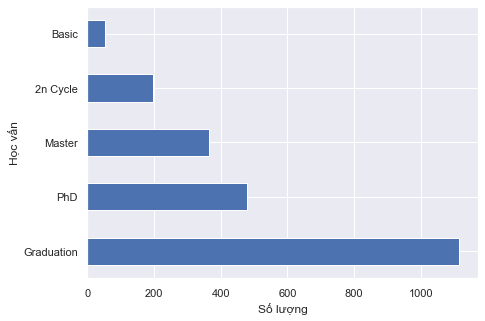

In [811]:
mkt_df['Education'].value_counts().plot.barh(figsize=(7, 5))
plt.xlabel("Số lượng")
plt.ylabel("Học vấn");

**2. Phân bố số con của khách hàng**

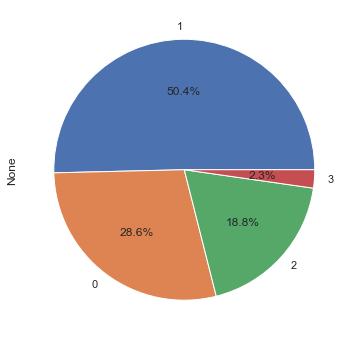

In [812]:
num_child = mkt_df['Kidhome'] + mkt_df['Teenhome']
num_child.value_counts().plot.pie(figsize=(8, 6), autopct='%.1f%%');

$\to$ Như vậy có khoảng 71.5% khách hàng có con, cũng khá nhiều...Ta sẽ tận dụng thông tin này sau

**3. Thống kê số lượt mua hàng qua các nền tảng**

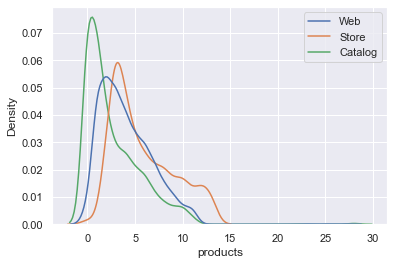

In [813]:
df = mkt_df[['Web', 'Store', 'Catalog']]
sns.kdeplot(data=df);
plt.xlabel('products');

- Nhận xét:
    - Số lượng mua hàng qua 3 hình thức: Store > Web > Catalog
    - Nhìn chung phần lớn đơn hàng có dưới 4 sản phẩm ở cả 3 hình thức 
    - Nhìn chung số mặt hàng trong 1 đơn hàng bất kỳ nằm trong khoảng [0, 15]

**4. Phân bố tuổi như thế nào?**

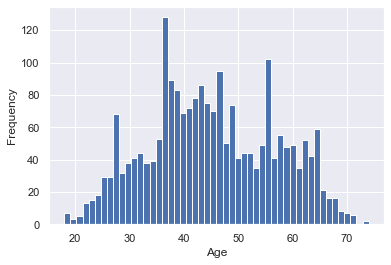

In [814]:
mkt_df['Age'].plot.hist(bins=50);
plt.xlabel('Age');

$\to$ Có vẻ khách hàng trong khoảng 35-50 tuổi chiếm phần lớn. Để dễ thống kê hơn, ta chia tuổi thành 4 nhóm tuổi:
Young: 0-30 tuổi, Mature: 30-45 tuổi, Middle-age: 45-65 tuổi, Old: >65 tuổi

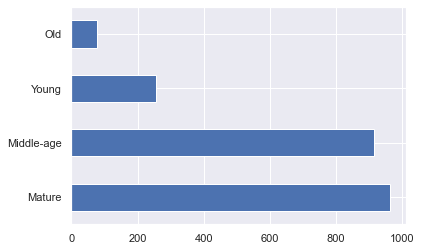

In [815]:
age_group = ['Young', 'Mature', 'Middle-age', 'Old']
age_range = [0, 30, 45, 65, 101] # từng cặp là từng nhóm tuổi. VD: [0-30] tuổi, [30-45] tuổi
age_transformed = pd.cut(mkt_df['Age'], bins=age_range, labels=age_group)
age_transformed.value_counts().plot.barh();

$\to$ Như vậy, nhóm tuổi trưởng thành (Mature) và trung niên (Middle-age) chiếm phần lớn. Trong mục tiếp theo, sẽ có phân tích riêng về 2 nhóm tuổi nổi bật này

**5. Phân bố thu nhập khách hàng như thế nào?**

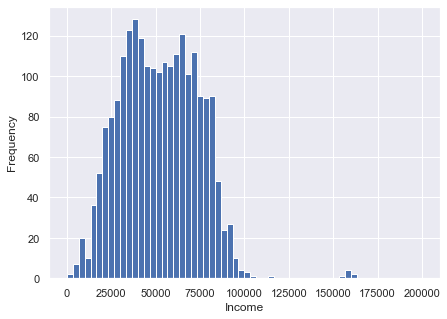

In [816]:
mkt_df['Income'].plot.hist(bins=60, range=(0,200000), figsize=(7,5))
plt.xlabel('Income');

$\to$ Như vậy phần lớn khách hàng có thu nhập nằm trong khoảng [0, 100K]

Để thuận tiện cho các bước tiền xử lý ở B.II, nhóm quyết định rời rạc hóa thuộc tính `Income` thành 4 nhóm: [Low, Low to medium, Medium, High] tương ứng với tứ phân vị trong cột `Income`

In [817]:
income_group = ['Low', 'Low to medium', 'Medium', 'High']
income_transformed = pd.qcut(mkt_df['Income'], q=4, labels=income_group)
income_transformed

0              Medium
1       Low to medium
2                High
3                 Low
4              Medium
            ...      
2235           Medium
2236           Medium
2237           Medium
2238             High
2239           Medium
Name: Income, Length: 2213, dtype: category
Categories (4, object): ['Low' < 'Low to medium' < 'Medium' < 'High']

**6. Thống kê số tiền của khách đã bỏ ra cho 6 mặt hàng**

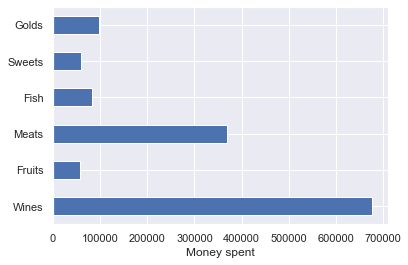

In [818]:
products = mkt_df[['Wines', 'Fruits', 'Meats', 'Fish', 'Sweets', 'Golds']]
products.sum().plot.barh()
plt.xlabel('Money spent');

$\to$ Có vẻ rượu (Wines) và thịt (Meats) là 2 sản phẩm được tiêu thụ nhiều. Tuy nhiên chưa đủ cơ sở chắc chắn điều này được vì mỗi sản phẩm có 1 giá tiền/1 sản phẩm khác nhau (VD: giá tiền trái cây hầu như luôn bé hơn giá tiền của 1 chai rượu). Câu này không mang ý nghĩa nhiều ngoài việc coi thử có sản phẩm nào mua ít quá hay nhiều quá

## II. Các câu hỏi in-depth

Danh sách câu hỏi:

1. Lượng tiêu thụ 6 sản phẩm của khách hàng từ 30/7/2012 - 29/6/2014 như thế nào?
2. Ứng với từng khách hàng có mức thu nhập khác nhau thì họ có xu hướng mua sản phẩm gì nhiều?
3. Ứng với mỗi sản phẩm công ty, phân khúc khách hàng nào sẽ mua sản phẩm đó nhiều nhất?
4. Hành vi mua hàng của những khách hàng có con và không con?
5. Thống kê số lượng duyệt web của khách hàng qua từng độ tuổi?
6. Ứng với từng chiến dịch Marketing thì những khách hàng chấp nhận ưu đãi trong chiến dịch đó có đặc điểm như thế nào?

## 1. Lượng tiêu thụ 6 sản phẩm của khách hàng từ 30/7/2012 - 29/6/2014 như thế nào?
**Lợi ích**: quan sát được tình hình bán 6 sản phẩm đang trên đà tăng hay giảm, từ đó tìm hiểu nguyên nhân và đưa ra chiến lược phù hợp

---

### Tiền xử lý
Như ở phần mô tả tóm tắt về dữ liệu, thuộc tính `Dt_Customer` có giá trị bé nhất là 30/7/2012 và lớn nhất là 29/6/2014, như vậy có thể chia thành 2 năm: 30/7/2012 - 30/7/2013 và 1/8/2013 - 29/6/2014 
- Bước 1: Xây dựng hàm `discretize_date(s)` dùng để phân ngày trong cột `Dt_Customer` vào 1 trong 4 nhóm: 'nửa đầu năm 1', 'nửa cuối năm 1', 'nửa đầu năm 2','nửa cuối năm 2'
- Bước 2: tạo 1 dataframe mới `df` để không làm thay đổi dataframe cũ là `mkt_df`, sau đó áp dụng hàm `discretize_date` lên cột `Dt_Customer` của df

Code bước 1

In [819]:
# Code bước 1
def discretize_date(s):
    if s < pd.Timestamp('2013-01-31'): # 30/7/2012 - 31/1/2013
        return 'nửa đầu năm 1'
    elif s < pd.Timestamp('2013-07-30'): # 1/2/2013 - 30/7/2013
        return 'nửa cuối năm 1'
    elif s < pd.Timestamp('2014-01-31'): # 1/8/2013 - 31/1/2014
        return 'nửa đầu năm 2'
    else: # 1/2/2014 - 29/6/2014
        return 'nửa cuối năm 2'

Code bước 2

In [820]:
df = mkt_df.copy()
df['Dt_Customer'] = df['Dt_Customer'].apply(discretize_date)
df['Dt_Customer'] # test

0        nửa đầu năm 1
1       nửa cuối năm 2
2        nửa đầu năm 2
3       nửa cuối năm 2
4        nửa đầu năm 2
             ...      
2235    nửa cuối năm 1
2236    nửa cuối năm 2
2237     nửa đầu năm 2
2238     nửa đầu năm 2
2239     nửa đầu năm 1
Name: Dt_Customer, Length: 2213, dtype: object

### Phân tích
- Bước 1: groupby cột `Dt_Customer` theo từng nhãn năm như đã nêu ở tiền xử lý và với mỗi cột sản phẩm (**products**), tính tổng cột đó để có được tổng tiêu thụ của từng sản phẩm 
- Bước 2: vẽ biểu đồ đường để thấy sự thay đổi trong lượng tiêu thụ của từng loại sản phẩm

Bước 1

In [821]:
# Bước 1
products = ['Wines', 'Meats', 'Golds', 'Fruits', 'Sweets', 'Fish']
# reindex: sắp xếp thứ tự hàng theo cách của mình
df = df.groupby('Dt_Customer')[products].sum().reindex(['nửa đầu năm 1', 'nửa cuối năm 1', 'nửa đầu năm 2', 'nửa cuối năm 2'])
df

,Wines,Meats,Golds,Fruits,Sweets,Fish
Dt_Customer,,,,,,
nửa đầu năm 1,226776,114113,31487,18565,18988,25951
nửa cuối năm 1,181467,99388,28538,14615,15261,22196
nửa đầu năm 2,157787,90190,22852,14761,15169,20299
nửa cuối năm 2,109275,65797,14299,10314,10410,14841


Bước 2

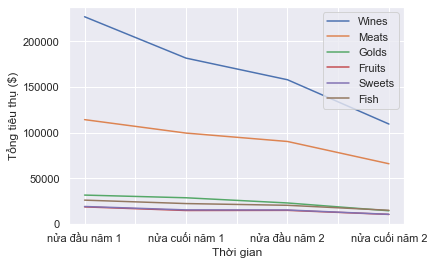

In [822]:
df.plot.line(ylabel='Tổng tiêu thụ ($)', xlabel='Thời gian');

Nhận xét:
- Nhìn chung các mặt hàng đều có lượng tiêu thụ giảm trong gần 2 năm liên tiếp, riêng lượng tiêu thụ rượu (Wines) giảm gần gấp đôi ở nửa cuối năm 2 và lượng tiêu thụ thịt (Meats) cũng giảm kha khá
- 3 sản phẩm còn lại giảm nhẹ và từ từ 

## 2. Ứng với từng nhóm khách hàng có mức thu nhập khác nhau thì họ có xu hướng mua sản phẩm gì nhiều?
**Lợi ích:** có thể biết được hành vi mua hàng của các khách hàng theo từng nhóm lương và đưa ra quyết định nên trưng bày các mặt hàng nào ở vị trí nào trong cửa hàng/website để phù hợp với từng nhóm khách hàng (VD: thượng lưu, bình dân)

---

### Tiền xử lý
Tạo 1 dataframe `df` chứa cột `Income` (đã rời rạc hóa) và 6 cột sản phẩm (`products`)

In [823]:
products = ['Wines', 'Meats', 'Golds', 'Fruits', 'Sweets', 'Fish']
df = mkt_df[products].copy()
df['Income'] = income_transformed
df.head()

,Wines,Meats,Golds,Fruits,Sweets,Fish,Income
0,635,546,88,88,88,172,Medium
1,11,6,6,1,1,2,Low to medium
2,426,127,42,49,21,111,High
3,11,20,5,4,3,10,Low
4,173,118,15,43,27,46,Medium


### Phân tích
- Bước 1: tính tổng giá trị của mỗi sản phẩm ứng với mỗi phân khúc `Income`.
- Bước 2: với mỗi nhóm lương `Income`, biến đổi giá trị trong 6 cột sản phẩm thành giá trị phần trăm (%). Như vậy với mỗi nhóm lương, tổng của mỗi cột trong 6 cột sản phẩm là 100%
- Bước 3: Vẽ biểu đồ 100% stacked horizontal bar chart để so sánh tỷ lệ phần trăm giữa các sản phẩm trong cùng 1 nhóm lương 

Code bước 1: groupby bởi thuộc tính Income và lấy tổng từng cột sản phẩm. Lưu kết quả vào dataframe `prods_income` 

In [824]:
prods_income = df.groupby("Income").sum()
prods_income.head()

,Wines,Meats,Golds,Fruits,Sweets,Fish
Income,,,,,,
Low,11939,12557,9335,3288,3282,4801
Low to medium,69137,26716,15537,4442,4732,7520
Medium,243328,89239,32474,16989,15826,21911
High,350901,240976,39830,33536,35988,49055


Code bước 2: 
- Xây dựng hàm `pct_converter(s)` nhận input là 1 cột series sản phẩm. Ta tính giá trị phần trăm của mỗi phần tử trong s và trả ra cột s mới. Như vậy nếu lấy tổng trên cột s mới thì sẽ được 100%
- Áp dụng hàm `pct_converter` cho từng cột trong dataframe `prods_income`. Lưu ý cần chuyển vị `prods_income` để các cột là mức lương, còn 6 hàng là 6 sản phẩm
- Lưu kết quả vào `prods_income_pct`

In [825]:
def pct_converter(s):
    return (s / s.sum() * 100).round(2)
prods_income_pct = prods_income.T.agg(pct_converter)
prods_income_pct.head()

Income,Low,Low to medium,Medium,High
Wines,26.41,53.98,57.97,46.77
Meats,27.78,20.86,21.26,32.12
Golds,20.65,12.13,7.74,5.31
Fruits,7.27,3.47,4.05,4.47
Sweets,7.26,3.69,3.77,4.80


Code bước 3: trước khi vẽ đồ thị cần chuyển vị `prods_income_pct` 1 lần nữa để phù hợp với định dạng mặc định liên quan tới tên hàng, tên cột trong matplotlib

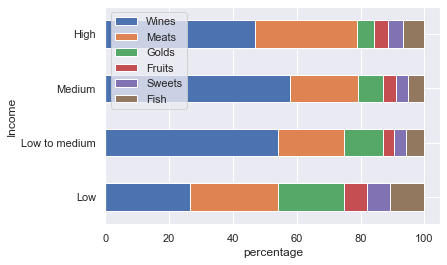

In [826]:
prods_income_pct = prods_income_pct.T
prods_income_pct.plot.barh(stacked=True)
plt.xlabel('percentage');

Nhận xét:
- Wines và Meats là 2 sản phẩm được chiếm phần lớn giá trị tiêu thụ ở 3 nhóm lương High, Medium và Low to medium
- Nhóm lương thấp (Low) có xu hướng phân bổ tiền đều cho 3 sản phẩm: Wines, Meats và Golds (với Golds ít hơn 1 chút)

## 3. Ứng với mỗi sản phẩm công ty, phân khúc khách hàng nào sẽ mua sản phẩm đó nhiều nhất?
**Lợi ích**: Xác định được khách hàng mục tiêu cho từng sản phẩm. Từ đó marketing sản phẩm tương ứng tới phân khúc khách hàng đó để tối đa hóa số lượng sản phẩm bán ra. Từ đó tăng doanh thu cho công ty

**"phân khúc khách hàng"** sẽ được quyết định dựa trên:
- Nhân khẩu học: Tuổi (`Age`), thu nhập (`Income`), và học vấn (`Education`), Số lượng con cái (`NumChild`) và tình trạng hôn nhân (`Relationship`)
- Hành vi mua hàng: 
    - Tính cách mua hàng - tức khách có mua hàng ở lần marketing thứ i không (`Camp`<font color='blue'>i</font> với <font color='blue'>i</font>=1..6) 
    - Nơi thực hiện mua hàng (`Web`, `Catalog` hay `Store`)

**"sản phẩm công ty"** chính là 6 sản phẩm hiện có trong tập dữ liệu: [`Wines`, `Fruits`, `Meats`, `Fish`, `Sweets`, `Golds`]

---

### Tiền xử lý
- Bước 1: tính số con của từng khách hàng và lưu vào cột `NumChild` $\to$ Tận dụng Series `num_child` ở mục I.3 thì coi như xong bước 1
- Bước 2: phân cột `Age` thành các nhóm: ['Young', 'Mature', 'Midlle-age', 'Old'] $\to$ Tận dụng Series `age` ở mục I.6 thì coi như xong bước 2
- Bước 3: phân cột `Income` thành 4 nhóm category: [Low, Low to medium, Medium, High] tương ứng với tứ phân vị trong cột `Income` $\to$ Đã làm ở B.1 nên coi như xong
- Bước 4: chuẩn bị dataframe `customer_seg` gồm các cột đã đề cập để chuẩn bị cho quá trình phân tích dữ liệu sắp tới

In [827]:
# Code bước 4
camp = [f'Camp{i}' for i in range(1,7)]
cols = ['Education', 'Web', 'Catalog', 'Store', 'Wines', 'Fruits', 'Meats', 'Fish', 'Sweets', 'Golds', 'Relationship'] + camp
customer_seg = mkt_df[cols].copy()

# add columns
customer_seg['Age'] = age_transformed # add cột Age
customer_seg['Income'] = income_transformed # add cột Income
customer_seg['NumChild'] = num_child # add cột NumChild

customer_seg.head()

,Education,Web,Catalog,Store,Wines,Fruits,Meats,Fish,Sweets,Golds,Relationship,Camp1,Camp2,Camp3,Camp4,Camp5,Camp6,Age,Income,NumChild
0,Graduation,8,10,4,635,88,546,172,88,88,Single,0,0,0,0,0,1,Middle-age,Medium,0
1,Graduation,1,1,2,11,1,6,2,1,6,Single,0,0,0,0,0,0,Middle-age,Low to medium,2
2,Graduation,8,2,10,426,49,127,111,21,42,Married,0,0,0,0,0,0,Middle-age,High,0
3,Graduation,2,0,4,11,4,20,10,3,5,Married,0,0,0,0,0,0,Young,Low,1
4,PhD,5,3,6,173,43,118,46,27,15,Married,0,0,0,0,0,0,Mature,Medium,1


### Phân tích: 
Dataframe `customer_seg` hiện đang lưu thông tin về 6 cột Products + 5 cột thông tin cá nhân + 9 cột hành vi mua hàng
- 6 cột sản phẩm: [`Wines`, `Fruits`, `Meats`, `Fish`, `Sweets`, `Golds`]
- 5 cột thông tin cá nhân: [`Age`, `Income`, `Education`, `NumChild`, `Relationship`]
- 9 cột hành vi mua hàng: [`Web`, `Catalog`, `Store`, `Camp1`, `Camp2`, ..., `Camp6`]

Ta phân tích ứng với từng sản phẩm thì phân khúc khách hàng của sản phẩm đó bao gồm những khách hàng có tính chất như thế nào? (VD: ứng với sản phẩm **Wines** thì những khách hàng có `Relationship=Single`,... có xu hướng mua nhiều hơn). Tóm tắt các bước làm (sẽ nói chi tiết ở từng bước):
- Bước 1: với mỗi sản phẩm, thống kê top các khách hàng chi nhiều tiền mua sản phẩm đó nhiều nhất, "nhiều nhất" được dựa trên phân vị 75% của từng cột sản phẩm và được lưu vào dataframe `top_customers`, tức là nếu 1 khách hàng thuộc phân vị này mua sản phẩm X nhiều hơn 75% các khách hàng còn lại
- Bước 2 (dự đoán phân khúc khách hàng): với mỗi một top khách hàng tìm dược ở bước 1, tìm ra điểm chung **lớn nhất** của các khách hàng này về mặt **thông tin cá nhân** và **hành vi mua hàng**. Kết quả là 1 dataframe `cust_by_prod` gồm 6 cột tương ứng 6 sản phẩm và 14 dòng = 5 dòng **thông tin cá nhân** + 9 dòng **hành vi mua hàng**

#### Code bước 1
- Định nghĩa 1 hàm hợp `top_customers_ix(prod)` nhận vào prod là 1 cột Series sản phẩm, trả ra chỉ số index của top khách hàng chi nhiều tiền mua sản phẩm prod ("nhiều" trong khoảng phân vị [0.75, 1])
- Sau đó áp dụng hàm hợp này lên cho 6 cột products 

In [828]:
def top_customers_ix(prod): # ix = index
    major_buy_mnt = pd.qcut(prod, [.75, 1]) # lấy các record khách hàng có SL mua món hàng thuộc vào phân vị 75%
    cust_ix = major_buy_mnt[~major_buy_mnt.isna()].index # lấy index các dòng thỏa DK trên, cũng là index các khách hàng
    return cust_ix.to_list() # return danh sách index khách hàng

products = ['Wines', 'Fruits', 'Meats', 'Fish', 'Sweets', 'Golds']
top_customers = customer_seg[products].agg([top_customers_ix])
top_customers

,Wines,Fruits,Meats,Fish,Sweets,Golds
top_customers_ix,"[0, 5, 15, 18, 22, 29, 36, 49, 51, 53, 55, 60, 62, 63, 67, 69, 73, 76, 77, 79, 96, 103, 111, 112, 116, 124, 131, 135, 140, 141, 143, 145, 154, 155, 159, 161, 163, 175, 176, 182, 188, 196, 197, 202, 203, 209, 211, 217, 219, 222, 224, 227, 228, 231, 234, 240, 243, 244, 246, 247, 248, 249, 254, 256, 261, 270, 275, 279, 292, 295, 299, 301, 305, 307, 308, 313, 323, 325, 332, 336, 338, 342, 351, 353, 354, 357, 358, 360, 361, 368, 369, 373, 378, 387, 389, 390, 394, 395, 401, 412, ...]","[0, 2, 4, 5, 6, 12, 18, 29, 34, 40, 45, 49, 51, 53, 55, 56, 64, 68, 69, 70, 72, 76, 77, 88, 99, 102, 103, 104, 107, 109, 110, 113, 116, 117, 120, 125, 126, 130, 132, 140, 144, 168, 175, 176, 198, 201, 202, 209, 228, 231, 240, 241, 243, 247, 248, 252, 253, 257, 261, 266, 268, 270, 276, 277, 286, 288, 292, 305, 313, 317, 323, 335, 336, 338, 345, 347, 350, 351, 353, 357, 360, 368, 387, 390, 392, 394, 401, 403, 411, 413, 414, 418, 423, 424, 426, 432, 433, 436, 447, 451, ...]","[0, 12, 18, 21, 29, 34, 40, 45, 49, 51, 53, 55, 56, 60, 64, 67, 69, 70, 72, 76, 77, 84, 88, 98, 103, 104, 107, 110, 111, 116, 126, 135, 140, 141, 142, 155, 159, 161, 163, 164, 168, 175, 179, 188, 191, 197, 198, 201, 202, 209, 211, 214, 217, 221, 228, 234, 240, 241, 243, 246, 248, 252, 254, 266, 268, 270, 277, 278, 287, 288, 292, 298, 307, 313, 323, 325, 335, 336, 338, 340, 347, 350, 351, 352, 353, 357, 360, 366, 368, 373, 390, 392, 395, 414, 415, 417, 424, 426, 427, 430, ...]","[0, 2, 6, 12, 15, 17, 20, 34, 39, 40, 45, 49, 53, 55, 56, 60, 64, 67, 69, 70, 72, 76, 77, 88, 98, 99, 102, 103, 104, 107, 116, 117, 126, 130, 140, 144, 159, 166, 168, 175, 176, 179, 188, 191, 198, 201, 203, 210, 214, 221, 228, 231, 240, 241, 243, 246, 247, 248, 249, 266, 268, 270, 276, 277, 282, 286, 287, 288, 292, 298, 305, 313, 317, 323, 335, 336, 340, 345, 347, 351, 353, 357, 358, 360, 366, 368, 382, 392, 395, 401, 411, 413, 415, 417, 418, 424, 426, 429, 432, 447, ...]","[0, 5, 6, 12, 15, 20, 29, 34, 39, 40, 49, 50, 51, 53, 55, 56, 64, 68, 70, 72, 77, 84, 88, 99, 102, 103, 107, 110, 111, 116, 117, 120, 124, 130, 132, 135, 140, 142, 143, 145, 159, 168, 175, 176, 188, 191, 197, 198, 202, 203, 211, 214, 217, 228, 231, 237, 240, 241, 248, 249, 252, 254, 266, 268, 270, 276, 278, 286, 287, 288, 298, 305, 307, 313, 325, 335, 336, 340, 345, 347, 350, 351, 357, 360, 366, 368, 382, 387, 390, 392, 399, 401, 411, 413, 418, 423, 426, 427, 429, 432, ...]","[0, 18, 24, 31, 40, 45, 53, 54, 55, 60, 62, 68, 69, 72, 83, 84, 88, 96, 98, 102, 103, 107, 110, 111, 112, 114, 117, 124, 125, 126, 130, 132, 142, 144, 152, 154, 159, 168, 176, 179, 182, 187, 191, 198, 199, 201, 203, 209, 215, 218, 224, 226, 227, 243, 244, 246, 247, 248, 249, 252, 266, 267, 268, 270, 276, 279, 281, 283, 286, 287, 292, 305, 320, 323, 325, 335, 338, 345, 347, 351, 360, 364, 365, 368, 373, 378, 386, 387, 389, 390, 392, 394, 403, 414, 418, 423, 427, 429, 431, 432, ...]"


#### Code bước 2
"điểm chung **lớn nhất**" của 1 cột Series bất kỳ là những giá trị có tần số xuất hiện trong cột đó thuộc phân vị 51% - tức xuất hiện nhiều hơn 1 nửa

Để code được bước 2, ta sẽ thử nghiệm với 1 cột `Wines` trước để biết được output có hình dáng ra sao. Sau đó mới tính toán và áp dụng cho 6 cột products

a) Thử nghiệm với cột `Wines`

Đầu tiên, định nghĩa hàm hợp `most_freq_val(s)` có chức năng tìm thông tin chung lớn nhất của cột s. Hàm này dùng để áp lên các cột ngoại trừ 6 cột sản phẩm. 

**Cách hoạt động**: Hàm nhận vào 1 Series `s`, tính tần số xuất hiện của từng <font color=green>**unique value của `s`**</font> (sử dụng value_counts()) và tìm ra những <font color=green>**value**</font> có tần số xuất hiện thuộc phân vị 51%.\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<u>VD</u>: Xét thuộc tính `Relationship` có <font color=green>**unique value**</font> = ['Married', 'Single'] với tần số xuất hiện lần lượt là [400, 100], thấy rằng trong khoảng phân vị 51% chỉ có <font color=green>**value**</font> = 'Married' thỏa nên hàm sẽ trả về ['Married']

In [829]:
def most_freq_val(s):
    # lọc ra unique value của cột s có tần số xuất hiện nhiều trong khoảng phân vị [0.51, 1].
    # Kết quả: Series có Series.index là unique value của cột s và 
    ## Series.value là NaN (nếu tần số không thuộc [0.51, 1]) hoặc khác NaN
    top_vals = pd.qcut(s.value_counts(), [0.51, 1]) 
    
    # lọc ra index của value xuất hiện nhiều (tức khác NaN)
    # Kết quả: là 1 mảng bool
    top_vals_ix = ~top_vals.isna()
    
    # tìm ra được điểm chung lớn nhất
    top_vals = top_vals[top_vals_ix].index.to_list()
    return top_vals

Tiếp theo:
- Lọc ra index nhóm khách hàng của sản phẩm `Wines` từ dataframe `top_customers` và lưu những index này vào biến `cust_ix`
- Từ index, lấy được cột thông tin cá nhân + thông tin hành vi của nhóm khách hàng này và lưu vào biến `cust`
- Áp dụng hàm hợp lên từng cột thông tin khách hàng của `cust` để biết phần lớn nhóm khách chi nhiều tiền cho `Wines` sẽ có đặc điểm là gì

In [830]:
cust_ix = top_customers.loc['top_customers_ix', 'Wines'] # lọc ra index nhóm khách hàng của Wines
cust = customer_seg.loc[cust_ix, ~customer_seg.columns.isin(products)] # lấy thông tin cá nhân + thông tin hành vi của nhóm này
cust_of_wines = cust.agg([most_freq_val]).iloc[0] # Kết quả là dataframe 1 dòng nên lấy dòng đầu là đủ
cust_of_wines

Education          [Graduation, PhD]
Web                  [5, 4, 6, 7, 3]
Catalog              [4, 6, 3, 5, 2]
Store              [10, 5, 8, 9, 12]
Relationship               [Married]
Camp1                            [0]
Camp2                            [0]
Camp3                            [0]
Camp4                            [0]
Camp5                            [0]
Camp6                            [0]
Age             [Middle-age, Mature]
Income                [High, Medium]
NumChild                      [0, 1]
Name: most_freq_val, dtype: object

Như vậy, với 1 cột `Wines`, ta biết được rằng phần lớn khách hàng có các đặc điểm như: đã tốt nghiệp, độ tuổi tầm trưởng thành (Mature) hoặc trung niên (Middle-age), thu nhập khá trở lên, ....Bây giờ ta đã sẵn sàng để mở rộng làm cho cả 6 cột sản phẩm

b) Làm trực tiếp trên 6 cột products của `top_customers`

- Định nghĩa hàm hợp `feature(prod)` với `prod` là cột Series sản phẩm trong `top_customers`. Công việc của hàm này giống y hệt cell code ngay phía trên, chỉ đổi tên biến và thay vì làm cho 1 cột thì sẽ làm cho cột `prod` bất kỳ

In [831]:
def feature(prod):
    cust_ix = top_customers.loc['top_customers_ix', prod.name] # lọc ra index nhóm khách hàng của prod
    cust = customer_seg.loc[cust_ix, ~customer_seg.columns.isin(products)] # lấy thông tin cá nhân + thông tin hành vi của nhóm này
    cust_of_prod = cust.agg([most_freq_val]).iloc[0] # Kết quả là dataframe 1 dòng nên lấy dòng đầu là đủ
    return cust_of_prod # kết quả là Series như cell code ngay trên

final_cust_segmentation = top_customers.agg([feature])
final_cust_segmentation

,Wines,Fruits,Meats,Fish,Sweets,Golds
,feature,feature,feature,feature,feature,feature
Education,"[Graduation, PhD]","[Graduation, PhD]","[Graduation, PhD]","[Graduation, PhD]","[Graduation, PhD]","[Graduation, Master]"
Web,"[5, 4, 6, 7, 3]","[4, 5, 3, 6, 7]","[4, 5, 3, 6, 7, 8]","[4, 5, 3, 6, 7]","[4, 5, 6, 3, 7, 8]","[5, 4, 6, 7, 3, 8]"
Catalog,"[4, 6, 3, 5, 2]","[4, 2, 6, 3, 5, 7]","[6, 5, 4, 7, 3, 10]","[4, 3, 6, 5, 2, 7]","[4, 6, 5, 3, 2, 7]","[2, 3, 4, 5, 6, 1]"
Store,"[10, 5, 8, 9, 12]","[10, 8, 6, 7, 12]","[6, 10, 5, 12, 7, 8, 9]","[5, 6, 10, 8, 12]","[10, 8, 6, 5, 7, 13]","[5, 8, 6, 12, 7, 9, 10]"
Relationship,[Married],[Married],[Married],[Married],[Married],[Married]
Camp1,[0],[0],[0],[0],[0],[0]
Camp2,[0],[0],[0],[0],[0],[0]
Camp3,[0],[0],[0],[0],[0],[0]
Camp4,[0],[0],[0],[0],[0],[0]


Vì output còn "hơi xấu" do:

- `final_cust_segmentation.columns` có 2 level:
    - level=0: Wines, Fruits, Meats, Fish, Sweets, Golds
    - level=1: feature, feature, feature, feature, feature, feature 

$\to$ Bỏ đi level=1 để nhìn đẹp và gọn hơn (sử dụng `DataFrame.droplevel`) 
  
- 3 cột `Web`, `Catalog`, `Store` có thể hiện dạng list khó nhìn và khó thống kê  

$\to$ Lấy mean mỗi cột 

In [832]:
final_cust_segmentation = final_cust_segmentation.droplevel(level=1, axis=1)
final_cust_segmentation.loc[['Web', 'Catalog', 'Store']] = final_cust_segmentation.loc[['Web', 'Catalog', 'Store']].applymap(lambda lst: np.mean(lst).round())
final_cust_segmentation

,Wines,Fruits,Meats,Fish,Sweets,Golds
Education,"[Graduation, PhD]","[Graduation, PhD]","[Graduation, PhD]","[Graduation, PhD]","[Graduation, PhD]","[Graduation, Master]"
Web,5.0,5.0,6.0,5.0,6.0,6.0
Catalog,4.0,4.0,6.0,4.0,4.0,4.0
Store,9.0,9.0,8.0,8.0,8.0,8.0
Relationship,[Married],[Married],[Married],[Married],[Married],[Married]
Camp1,[0],[0],[0],[0],[0],[0]
Camp2,[0],[0],[0],[0],[0],[0]
Camp3,[0],[0],[0],[0],[0],[0]
Camp4,[0],[0],[0],[0],[0],[0]
Camp5,[0],[0],[0],[0],[0],[0]


Như vậy, có thể bắt đầu rút trích insights từ đây

1. Đặc điểm chung của những người hay chi nhiều tiền cho 1 trong 6 sản phẩm này là: (**tốt nghiệp bậc đại học trở lên**), (**hay mua hàng tại cửa hàng**), (**đã cưới**), (**người trưởng thành hoặc trung niên**), (**đạt lương vừa/cao**), (**không có hoặc có 1 con**) và (**không cần thông qua các chiến dịch marketing mới mua hàng**)


2. Các khách hàng này phần lớn vẫn ưa chuộng việc mua sắm trực tiếp tại cửa hàng $\to$ Cần duy trì, nâng cấp các chi nhánh cửa hàng của công ty 


3. Với nền tảng Web công ty, lượng người mua nhìn chung khá tốt. Riêng với thịt (Meats), đồ ngọt (Sweets) và vàng (Golds) được khách hàng mua online nhiều hơn các món khác $\to$ Đây có thể là 3 món hàng tiềm năng nên cần tăng số lượng 3 mặt hàng này nhưng vẫn đảm bảo chất lượng và có thể kèm theo khuyến mãi để lôi kéo nhiều khách hàng hơn. Với 3 mặt hàng còn lại, khách hàng cũng ưa chuộng không kém nên ta có thể tăng cường các hình thức khuyến mãi hoặc marketing các mặt hàng này nhiều hơn nữa


4. Khách hàng có xu hướng mua nhiều thịt hơn các mặt hàng còn lại thông qua các ấn phẩm/danh mục quảng cáo (Catalog) 

## 4. Hành vi mua hàng của những khách hàng có con và không con?

**Lợi ích**: nắm được việc hành vi mua hàng của mỗi khách hàng có con, ta sẽ biết những ông bố/bà mẹ hoặc khách hàng không có con ưu tiên mua gì cho gia đình hoặc cho riêng họ

Lý do khảo sát nhóm khách hàng này: Như ta đã biết mục I.3, có 71.5% khách hàng có con - chiếm hơn 2/3 số lượng khách hàng. Như vậy là đủ để ta tò mò về thông tin cá nhân và hành vi mua của nhóm khách hàng này. Và không chỉ quan tâm tới những khách hàng có con, công ty cũng nên quan tâm tới hành vi mua hàng ở những người không có con để đưa ra 1 số chiến lược phù hợp cho cả 2 đối tượng này

---


Các bước phân tích:
- Bước 1: lọc ra dataframe `customers` gồm tất cả khách hàng cùng số con của họ
- Bước 2: vì số lượng khách hàng có con (>=1 con) và không con chệnh lệch nhau nhiều nên nếu so sánh thì sẽ bị không công bằng cho nhóm không con. Vì thế nên ta lấy mẫu random sampling ở nhóm có con
- Bước 3: tạo thêm cột `HasChild` có giá trị nhị phân 1 - tức có con, và 0 - tức không có con
- Bước 4: gom nhóm trên thuộc tính `HasChild` vừa tạo và lấy tổng trên mỗi cột sản phẩm cho mỗi nhóm
- Bước 5: trực quan hóa   

Code bước 1: tận dụng biến `num_child` đã có ở I.3 để có được số con của từng khách hàng

In [833]:
customers = mkt_df.drop(columns=['Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Complain', 'ID'])
customers['NumChild'] = num_child # thêm cột num_child ở mục I.3
customers.head()

,Education,Relationship,Income,Wines,Fruits,Meats,Fish,Sweets,Golds,DiscountDeals,Web,Catalog,Store,WebVisit,Camp3,Camp4,Camp5,Camp1,Camp2,Camp6,Age,NumChild
0,Graduation,Single,58138.0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,57,0
1,Graduation,Single,46344.0,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,60,2
2,Graduation,Married,71613.0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,49,0
3,Graduation,Married,26646.0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,30,1
4,PhD,Married,58293.0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,33,1


Code bước 2: 
- Đầu tiên, coi tần số xuất hiện của từng nhóm con cái trong dataframe `customers`

In [834]:
child_counts = customers['NumChild'].value_counts()
child_counts

1    1115
0     632
2     416
3      50
Name: NumChild, dtype: int64

- Thấy rằng số nhóm 0-con là 632 lần xuất hiện. Như vậy để tránh lệch trong so sánh, cần lấy 632 khách hàng có con (632 khách hàng bao gồm 1/2/3 con)
- Mà số khách hàng 3 con chỉ có 50 người; vì khá ít nên lấy hết. Như vậy cần sample 632 - 50 = 582 khách hàng có 1 hoặc 2 con. Giả sử ta lấy số lượng mẫu như nhau ở 2 nhóm này, như vậy mỗi nhóm lấy mẫu ngẫu nhiên khoảng 582/2 = 291 người
- Tóm lại ta chỉ cần lấy mẫu ngẫu nhiên 291 người cho lần lượt nhóm 1-con và 2-con (lưu vào dataframe `one_child` & `two_child`), sau đó kết hợp với nhóm 3-con và 0-con thành 1 dataframe cuối cùng là `has_child_df`

In [835]:
n_sample = int((child_counts[0] - child_counts[3])/2) # result: 291 người
one_child = customers.loc[customers['NumChild'] == 1].sample(n=n_sample)
two_child = customers.loc[customers['NumChild'] == 2].sample(n=n_sample)
has_child_df = pd.concat([one_child, 
                          two_child, 
                          customers.loc[(customers['NumChild'] == 3) | (customers['NumChild'] == 0)]])

Code bước 3: tạo cột `HasChild` có giá trị nhị phân để phân loại khách hàng vào nhóm có con (1) hay không có con (0)

In [836]:
has_child_df['HasChild'] = has_child_df['NumChild'] > 0
has_child_df['HasChild'].value_counts() # test phân lớp có đồng đều chưa

True     632
False    632
Name: HasChild, dtype: int64

Code bước 4 & 5: Ta gom nhóm trên cột `HasChild` và lấy tổng tiêu thụ trên mỗi cột sản phẩm và lưu vào dataframe `df`. Sau đó sẽ trực quan hóa kết quả df này bằng bar chart

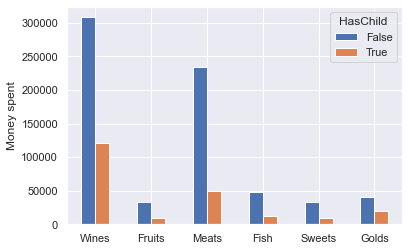

In [837]:
df = has_child_df.groupby('HasChild')[['Wines', 'Fruits', 'Meats', 'Fish', 'Sweets', 'Golds']].sum()
df.T.plot.bar(rot=0, ylabel= 'Money spent');

Nhận xét: 
- Nhìn chung rượu và thịt vẫn là 2 sản phẩm được chi tiêu nhiều ở 2 nhóm khách hàng
- 1 điểm bất ngờ là nhóm khách có con tuy chiếm phần lớn tập khách hàng nhưng lượng tiêu thụ lại ít hơn nhóm khách hàng không có con ở cả 6 sản phẩm. Lý do có thể do các ông bố/bà mẹ phải giành thời gian cho con cái nhiều hơn những người chưa có con nên họ ít đi mua sắm hơn, hoặc có thể họ muốn chi tiêu tiết kiệm cho gia đình nên mua ít hơn

### Câu hỏi kéo theo: Khách hàng có con thường chấp nhận offer vào lần marketing thứ mấy (So sánh với nhóm không có con xem thế nào)

**Lợi ích**: Khi biết được kích thước gia đình của từng khách hàng và cách họ mua hàng thông qua các chiến dịch marketing, công ty sẽ biết lần marketing nào thì nên đầu tư nhân lực về marketing và trưng bày nhiều sản phẩm như Wines và Meats chiến dịch đó

- Bước 1: gom nhóm trên thuộc tính `HasChild` và tính tổng số lần khách hàng tham gia chiến dịch Camp**i** (1 <= i <= 6)
- Bước 2: trực quan hóa

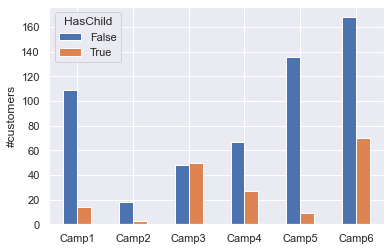

In [839]:
df = has_child_df.groupby('HasChild')[camp].sum() # Bước 1
df.T.plot.bar(rot=0, grid=True, ylabel= '#customers'); # bước 2

Nhận xét:
1. Ở các khách hàng có con, có vẻ họ dễ bị thuyết phục bởi các chiến dịch marketing lần 3,4,6
2. Ở các khách hàng không có con, có vẻ họ dễ bị thuyết phục hơn nhóm khách hàng có con và thường tham gia chiến dịch marketing thứ 1,5,6 
3. Cần thúc đẩy marketing mạnh nhất ở chiến dịch thứ 6 vì đây là chiến dịch thu hút 2 nhóm khách hàng này nhiều nhất 

## 5. Thống kê số lượng duyệt web của khách hàng theo từng độ tuổi?
**Lợi ích:** sau khi biết được thì ta có thể dễ dàng xây dựng được nội dung marketing trên trang web để phù hợp với độ tuổi của các khách hàng duyệt web.

---

### Tiền xử lý
- Bước 1: tạo dataframe mới `df` gồm cột `WebVisit` và cột `Age`
- Bước 2: rời rạc hóa cột `Age` thành các nhóm: `['Young', 'Mature', 'Midlle-age', 'Old']` $\to$ Đã làm và lưu vào biến `age` ở I.6

In [ ]:
df = mkt_df[["WebVisit", "Age"]].copy()
df["Age"] = age_transformed

### Phân tích
- Bước 1: tính tổng số lần duyệt web trong tháng của các khách hàng trong từng độ tuổi.
- Bước 2: Visualize dữ liệu vừa tính được để thấy rõ hơn về phân bố số lần duyệt web của từng độ tuổi của khách hàng.

Code bước 1:

In [ ]:
visitweb_per_age = df.groupby("Age").sum()
visitweb_per_age

,WebVisit
Age,
Young,1400
Mature,5417
Middle-age,4668
Old,292


Code bước 2:

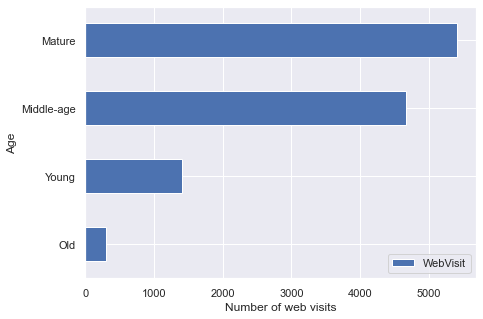

In [ ]:
visitweb_per_age.sort_values(by='WebVisit').plot.barh(figsize=(7,5));
plt.xlabel("Number of web visits");

Nhận xét
- Độ tuổi `Middle-age` (trung niên) và `Mature` (trưởng thành) khá là nhiều vì 2 độ tuổi này là thưởng đóng vai trò là người đi mua sắm chính trong gia đình.
- Còn các khách hàng ở độ tuổi `Young` và `Old` thường ít đi mua sắm hơn.

$\to$ Tìm cách để xây dụng nội dung Marketing sao cho hợp lý với độ tuổi `Middle-age` và `Mature`, giúp cho khách hàng có thể dễ dàng tìm được món hàng mà mình yêu thích và khách hàng cũng thấy dễ chịu khi duyệt web.

## 6. Ứng với từng chiến dịch Marketing thì những khách hàng chấp nhận ưu đãi trong chiến dịch đó có đặc điểm như thế nào?
**Lợi ích:** chúng ta biết được khách hàng nào thường chấp nhận ưu đãi nào $\to$ có thể xây dựng chiến dịch nào đó có thể bao quát toàn bộ các phân khúc khách hàng không? $\to$ <font color="green">**làm như vậy thì sẽ giúp giảm bớt được chi phí cho việc triển khai nhiều chiến dịch Marketing**</font><br>

Sử dụng các **đặc điểm** sau của khách hàng:<br>
- Tuổi (`Age`), thu nhập (`Income`), và học vấn (`Education`), Số lượng con cái (`NumChild`) và tình trạng hôn nhân (`Marital_Status`)
- Hành vi mua hàng: 
    - Tính cách mua hàng - tức khách có mua hàng ở lần marketing thứ i không (`AcceptedCmp`<font color='blue'>i</font> với <font color='blue'>i</font>=1..6) 
    - Nơi thực hiện mua hàng (`NumWebPurchases`, `NumCatalogPurchases` hay `NumStorePurchases`)

---

### Tiền xử lý
- Bước 1: phân cột `Age` thành các nhóm: ['Young', 'Mature', 'Midlle-age', 'Old'] $\to$ Đã làm ở mục I.6
- Bước 2: phân cột `Income` thành 3 nhóm category: [Low, Low to medium, Medium, High] tương ứng với tứ phân vị $\to$ Sử dụng lại `income_transformed` ở trên thì xong bước 2
- Bước 3: tạo dataframe chứa các đặc điểm trên `Age`, `Income`, `Education`, `NumChild`, `Marital_Status`

Code bước 3

In [ ]:
accepted_cmp = [f'Camp{i}' for i in range(1,7)]
cols = ['Education', 'Web', 'Catalog', 'Store', 'Wines', 'Fruits', 'Meats',\
        'Fish', 'Sweets', 'Golds', 'Relationship'] + accepted_cmp
df = mkt_df[cols].copy()

# add columns
df['Age'] = age_transformed
df['Income'] = income_transformed

df.head()

,Education,Web,Catalog,Store,Wines,Fruits,Meats,Fish,Sweets,Golds,Relationship,Camp1,Camp2,Camp3,Camp4,Camp5,Camp6,Age,Income
0,Graduation,8,10,4,635,88,546,172,88,88,Single,0,0,0,0,0,1,Middle-age,Medium
1,Graduation,1,1,2,11,1,6,2,1,6,Single,0,0,0,0,0,0,Middle-age,Low to medium
2,Graduation,8,2,10,426,49,127,111,21,42,Married,0,0,0,0,0,0,Middle-age,High
3,Graduation,2,0,4,11,4,20,10,3,5,Married,0,0,0,0,0,0,Young,Low
4,PhD,5,3,6,173,43,118,46,27,15,Married,0,0,0,0,0,0,Mature,Medium


### Phân tích: 
Dataframe `df` hiện đang lưu thông tin về 6 cột Products + 5 cột thông tin cá nhân + 9 cột hành vi mua hàng
- 6 cột Products: [`Wines`, `Fruits`, `Meats`, `Fish`, `Sweets`, `Golds`]
- 5 cột thông tin cá nhân: [`Age`, `Income`, `Edu`, `NumChild`, `Relationship`]
- 9 cột hành vi mua hàng: [`Web`, `Catalog`, `Store`, `Camp1`, ... `Camp6`]

- Bước 1: Đổi giá trị của các cột `Camp`<font color='green'>**i**</font>. VD: cột Camp1 có giá trị 1 thì đổi thành 1, cột Camp2 cóa giá trị 1 thì đổi thành 2,..., cột Camp<font color='green'>i</font> có giá trị 1 thì đổi thành giá trị <font color='green'>i</font>
- Bước 2: ứng với từng nhóm khách hàng (i.e nhóm đồng ý với ưu đãi ở lần marketting thứ i) tìm ra tổng của các phần dữ liệu dạng số và tính mode cho các phần dữ liệu dạng Categorical. 

Bước 1

In [ ]:
for i, col in enumerate(accepted_cmp):
    df[col][df[col] > 0] = i + 1

Bước 2

In [ ]:
accepted_df = pd.DataFrame()

for i, col in enumerate(accepted_cmp):
    new_df = df[df[col] > 0]
    for column in accepted_cmp:
        if column != col:
            new_df.drop(column, axis=1, inplace=True)
    
    new_df.rename(columns={col: 'AcceptedCmp'}, inplace=True)
    numeric_df = new_df.select_dtypes(include=['int64', 'float64'])
    category_df = new_df[new_df['AcceptedCmp'] > 0].select_dtypes(exclude=['int64', 'float64'])
    category_df = pd.concat([category_df, new_df['AcceptedCmp'][new_df['AcceptedCmp'] > 0]], axis=1)
    
    new_df = pd.concat([numeric_df.groupby('AcceptedCmp').sum().reset_index().drop('AcceptedCmp', axis=1),\
                        category_df.groupby('AcceptedCmp').apply(pd.DataFrame.mode).droplevel(0)], axis=1)
    accepted_df = pd.concat([accepted_df, new_df], axis=0)

In [ ]:
accepted_df.reset_index(drop=True, inplace=True)
accepted_df

,Web,Catalog,Store,Wines,Fruits,Meats,Fish,Sweets,Golds,Education,Relationship,Age,Income,AcceptedCmp
0,817,870,1139,107640,7884,61811,13116,9300,11026,Graduation,Married,Middle-age,High,1
1,147,155,245,26960,689,7509,1162,918,1992,Graduation,Married,Middle-age,High,2
2,734,612,816,61721,4628,29612,6128,4448,10911,Graduation,Married,Mature,Low to medium,3
3,929,676,1287,123038,4470,39305,6684,5131,7932,Graduation,Married,Middle-age,High,4
4,881,971,1335,140795,9011,75238,12191,10455,12319,Graduation,Married,Mature,High,5
5,1689,1399,2025,167371,12634,97824,17221,12778,20397,Graduation,Single,Mature,High,6


Bước 3: Visualize số lượng các mặt hàng trong `accepted_df` theo từng chiến dịch

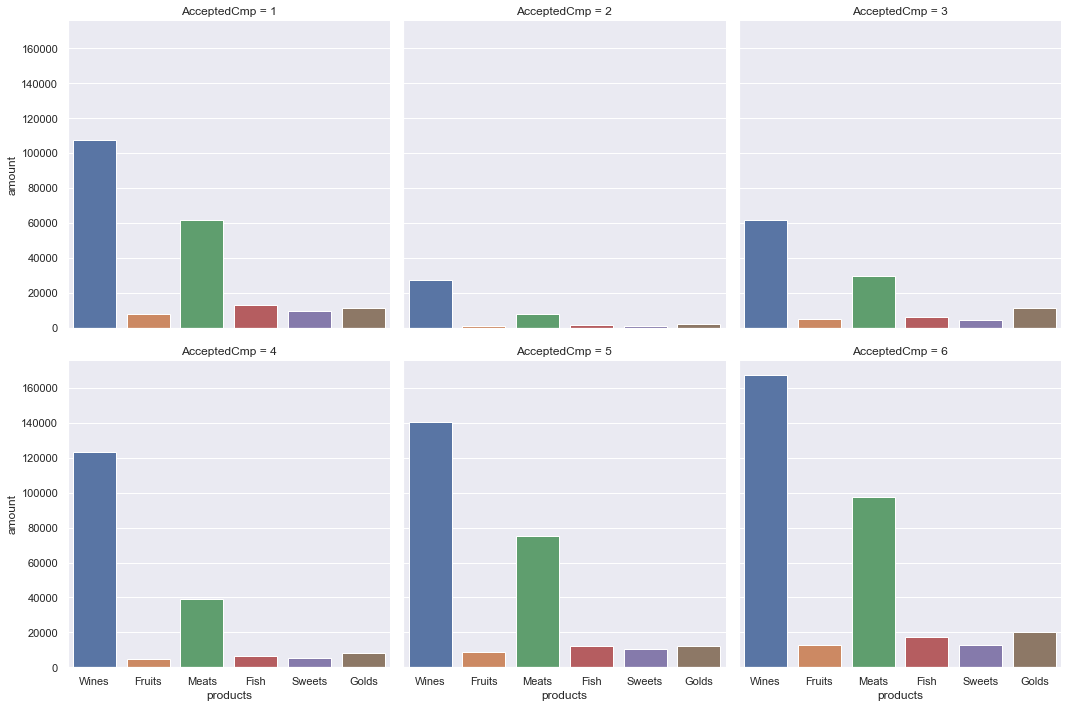

In [ ]:
final_df = pd.melt(accepted_df[['Wines', 'Fruits', 'Meats', 'Fish', 'Sweets', 'Golds', 'AcceptedCmp']], 
                   id_vars='AcceptedCmp', var_name='products', value_name='amount')
sns.catplot(x="products", y="amount", col="AcceptedCmp", data=final_df, kind="bar", col_wrap=3);
sns.set_theme(style="darkgrid")

Nhận xét:
- Các khách hàng chấp nhận qua từng chiến dịch Marketing có đặc điểm chung là mua các sản phẩm làm từ thịt và rượu nhiều hơn các loại sản phẩm khác
- Vàng (Golds) được mua nhiều ở lần marketing thứ 1,3,5,6
- Cá (Fish), đồ ngọt (Sweets) và trái cây (Fruits) được mua nhiều ở lần marketing thứ 1,5,6

Bước 4: Visualize số lượng khách hàng trong `accepted_df` mua hàng ở từng nền tảng

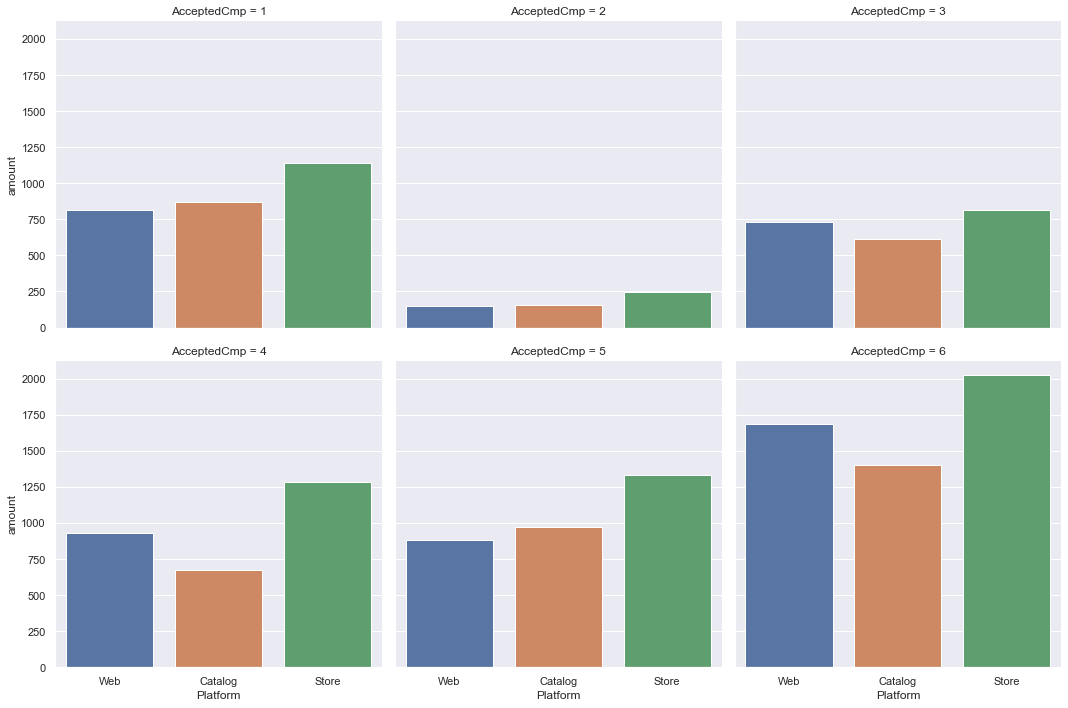

In [ ]:
final_df = pd.melt(accepted_df[['Web', 'Catalog', 'Store', 'AcceptedCmp']], 
                   id_vars='AcceptedCmp', var_name='Platform', value_name='amount')
sns.catplot(x="Platform", y="amount", col="AcceptedCmp", data=final_df, kind="bar", col_wrap=3);
sns.set_theme(style="darkgrid")

Nhận xét:
- Chiến dịch marketing thứ 2 thu hút ít khách hàng nhất so với các chiến dịch còn lại
- Chiến dịch marketing thứ 3 thu hút gần như là đều các khách hàng ở cả 3 nền tảng
- Nhìn chung xu hướng mọi người ưa chuộng đi ra cửa hàng (Store) nhiều hơn

$\to$ Sau quá trình phân tích ta rút ra được là các khách hàng chấp nhận qua từng chiến dịch Marketing có các đặc điểm chung như là mua các sản phẩm làm từ thịt và rượu nhiều hơn các loại sản phẩm khác và có xu hướng mua hàng qua các nền tảng Web hoặc mua trực tiếp tại cửa hàng. Vậy có thể giảm bớt việc triển khai nhiều chiến dịch Marketing bằng cách đưa ra 1 chiến dịch Marketing phù hợp cho mọi khách hàng.

# C. Tham khảo

1. https://thecleverprogrammer.com/2021/02/08/customer-personality-analysis-with-python/
2. https://www.kaggle.com/imakash3011/customer-analysis-eda-report-clustering
3. https://www.kaggle.com/dmitryuarov/customers-clustering-eda

# D. Nhìn lại quá trình làm đồ án

## 1. Khó khăn
- Nhìn chung, còn vụng về trong việc kết hợp github. Cụ thể là merge và giải quyết conflict notebook; nhánh branch còn lộn xộn
- Không thống nhất 1 số bước nhỏ (VD: đổi tên cột cho ngắn) + quy tắc code (VD: cách viết markdown chỗ nào cần bôi đậm, chỗ nào cần gạch đầu dòng để thống nhất) ngay từ đầu nên quay lại bước tiền xử lý + chỉnh sửa lặt vặt xuyên suốt khá nhiều
- Khó khăn trong việc đặt câu hỏi ý nghĩa
- Khó khăn trong việc kiếm dataset phù hợp

## 2. Bài học
- Nguyễn Minh Lương (19120571):
    - Học được cách sử dụng Git Bash, quản lý các phiên bản Notebook.
    - Vận dụng các hàm đã học để áp dụng vào việc phân tích dữ liệu.
    - Vận dựng các biểu đồ được học để visualize dữ liệu để đưa ra insight về dữ liệu.

- Lê Kiệt (19120554): 
    - Học được về cách quản lý github và tạo pull request trên github
    - Vận dụng loại biểu đồ vào từng loại câu hỏi để nâng cấp đồ thị từ việc chỉ 'show data' cho đến 'tell stories with data'
    - Cách biểu đồ trong matplotlib hoạt động chung với dataframe trong pandas ra sao (thông qua df.plot)

## 3. Cơ hội
- Nếu có thêm thời gian thì tụi em cũng không rõ làm gì được thêm :D. Có thể áp dụng thuật toán clustering nào đó cho bài toán phân khúc khách hàng chằng hạn để cho kết quả phân cụm tốt hơn và dễ hiểu hơn